In [1]:
from traits.api import Delegate, HasTraits, Instance, Int, Str

In [2]:
class Parent ( HasTraits ):

    # INITIALIZATION: last_name' is initialized to '':
    last_name = Str( '' )


class Child ( HasTraits ):

    age = Int

    # VALIDATION: 'father' must be a Parent instance:
    father = Instance( Parent )

    # DELEGATION: 'last_name' is delegated to father's 'last_name':
    last_name = Delegate( 'father' )

    # NOTIFICATION: This method is called when 'age' changes:
    def _age_changed ( self, old, new ):
        print 'Age changed from %s to %s ' % ( old, new )

In [3]:
# Set up the example:
joe = Parent()
joe.last_name = 'Johnson'
moe = Child()
moe.father = joe

In [4]:
# DELEGATION in action:
print "Moe's last name is %s " % moe.last_name

Moe's last name is Johnson 


In [5]:
# NOTIFICATION in action
moe.age = 10

Age changed from 0 to 10 


In [6]:
# VISUALIZATION: Displays a UI for editing moe's attributes
# (if a supported GUI toolkit is installed)
moe.configure_traits()

Age changed from 10 to 2 


True

922
784


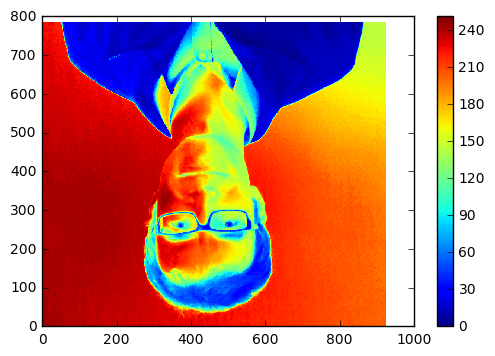

In [156]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import numpy as np


#directory = 'D://Users//D.Rudolf-Lvovsky//Denis//Juelich-2017//Data//PEEM_space_charge//'
#im = Image.open(directory + '003_BiTe_EUV_2-4kV_1500Hz_001.tif')
#
directory = 'D://Users//D.Rudolf-Lvovsky//Denis//Bewerbung//Foto//'
im = Image.open(directory + 'Denis-CV.tif')


#draw = ImageDraw.Draw(im)
#draw.line((0, 0) + im.size, fill=128)
#draw.line((0, im.size[1], im.size[0], 0), fill=128)
#del draw

width = im.size[0]
height = im.size[1]
print width
print height

image = np.array(im.getdata())[:,0].reshape(height,width)
plt.pcolormesh(image)
plt.colorbar()
plt.show()

In [142]:
# create the data points for the line
#x1,x2 = 290,410 
#y1,y2 =290,300
x1,x2 = 1,800 
y1,y2 =250,250
t = np.arange(0,1,1e-3)
x = x1+(x2-x1)*t
y = y1+(y2-y1)*t
#grid_x, grid_y = np.meshgrid(x,y)
#grid_x, grid_y = grid_x.T, grid_y.T

In [143]:
# data points at which to interpolate
x = [[i] for i in x]
y = [[i] for i in y]
x_i = np.concatenate((x,y), axis = 1)

In [144]:
# make points of the image
list_x, list_y =range(1,width+1,1), range(1,height+1,1) 
points = [[i,j] for i in list_x for j in list_y]

In [145]:
# values at points
values = image.flatten()

In [146]:
import time
from scipy.interpolate import griddata
start = time.time()
image_interpolated = griddata(points, values, x_i, method='linear')
end = time.time()
'The interpolation took {} s.'.format(end-start)

'The interpolation took 15.5520000458 s.'

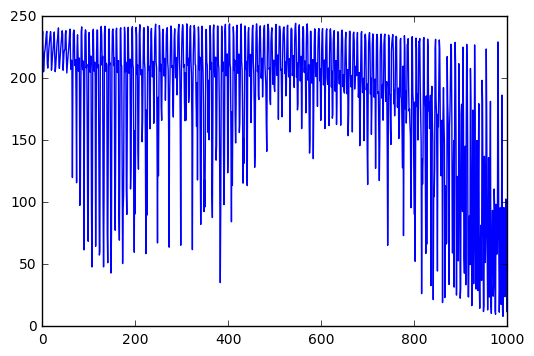

In [147]:
plt.plot(image_interpolated)
plt.show()

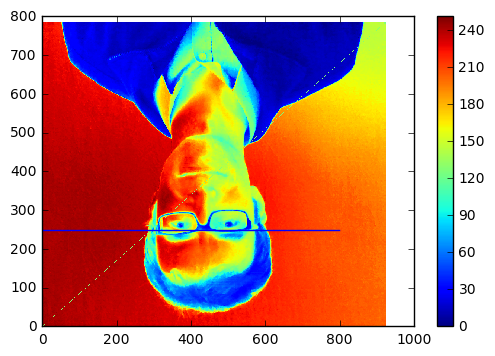

In [155]:
plt.pcolormesh(image)
plt.colorbar()
plt.plot(x,y)
plt.show()

In [153]:
x_i

array([[   1.   ,  250.   ],
       [   1.799,  250.   ],
       [   2.598,  250.   ],
       ..., 
       [ 797.603,  250.   ],
       [ 798.402,  250.   ],
       [ 799.201,  250.   ]])

In [31]:
def func(x, y):
    return x*(1-x)*np.cos(4*np.pi*x) * np.sin(4*np.pi*y**2)**2

In [32]:
points = np.random.rand(1000, 2)
values = func(points[:,0], points[:,1])

In [33]:
points

array([[ 0.17647837,  0.97406543],
       [ 0.19750452,  0.75160821],
       [ 0.06415093,  0.89354342],
       ..., 
       [ 0.42304976,  0.97485611],
       [ 0.65700262,  0.76308495],
       [ 0.15001457,  0.08592225]])

In [34]:
values

array([ -3.15216985e-02,  -6.64194889e-02,   1.35796197e-02,
        -3.80038063e-02,   1.76326092e-03,   5.51988945e-02,
        -2.44016482e-03,  -2.89031355e-02,   1.25117601e-01,
        -4.94703829e-02,  -1.30174612e-01,  -5.79413329e-02,
        -6.54566351e-02,   8.02082198e-04,   1.43980523e-02,
        -1.32221287e-01,   1.00436860e-01,  -4.01185952e-05,
         7.16950099e-03,  -4.89922692e-02,  -8.38318758e-04,
         2.55373069e-02,   1.30823186e-01,  -1.01534400e-01,
         9.39609908e-02,  -9.28329704e-05,  -5.19598640e-02,
        -1.60642644e-04,   2.45536258e-01,  -3.98950852e-02,
        -7.72769104e-02,  -1.40607763e-02,  -2.53372881e-02,
         2.87267156e-04,  -1.09640506e-01,   1.95977282e-04,
        -1.79104981e-01,   1.41054185e-02,  -5.10616691e-02,
        -8.22302287e-06,  -1.39912212e-01,   2.44300849e-04,
         6.57196005e-04,  -6.05614968e-03,   5.72316970e-02,
        -5.31210957e-03,  -1.90186972e-02,   2.45781924e-02,
         1.47132409e-02,